In [1]:
"""Data Analyzing & Cleaning"""

from pathlib import Path
from data.clean_data import clean_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests


In [2]:
# Check if raw data exists
if not Path('./data/csv/raw_data.csv').exists():
  print('none file')
  df = pd.read_csv(
    "https://web-app-media-assests.sfo3.cdn.digitaloceanspaces.com/Indicators_of_Heart_Disease/2022/heart_2022_with_nans.csv"
	)
else: df = pd.read_csv('data/csv/raw_data.csv', index_col=None)

Key Features for a Predictive Model

For a predictive machine learning model, the strongest predictors are likely:

	- HadHeartAttack
	- HadAngina
	- HadStroke
	- HadDiabetes
	- SmokerStatus
	- BMI
	- AgeCategory
	- Sex

In [3]:
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [4]:
if not Path('./data/csv/clean_data.csv').exists():
	df = clean_data(df, 'data/csv/')
else: df = pd.read_csv('./data/csv/clean_data.csv')

In [5]:
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HighRiskLastYear
0,11,1,2.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,1.0,0.0,1.0,3.0,12.0,1.70,80.74,27.44,0.0,0.0
1,11,1,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,3.0,12.0,1.60,68.04,26.57,0.0,0.0
2,11,1,2.0,2.0,3.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,3.0,7.0,1.57,63.50,25.61,0.0,0.0
3,11,1,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,...,0.0,2.0,0.0,3.0,9.0,1.65,63.50,23.30,0.0,0.0
4,11,1,3.0,2.0,0.0,0.0,1.0,9.0,0.0,0.0,...,0.0,0.0,0.0,3.0,4.0,1.57,53.98,21.77,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0,1,1.0,0.0,3.0,1.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.65,69.85,25.63,1.0,0.0
445128,0,1,0.0,2.0,2.0,0.0,1.0,7.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.0,1.70,83.01,28.66,0.0,0.0
445129,0,1,4.0,30.0,30.0,3.0,0.0,5.0,0.0,0.0,...,0.0,3.0,3.0,3.0,9.0,1.70,49.90,17.23,1.0,0.0
445130,0,0,2.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,...,0.0,0.0,0.0,2.0,10.0,1.83,108.86,32.55,0.0,0.0


In [6]:
from sklearn.preprocessing import StandardScaler

# scale df
sclr = StandardScaler()
scld_features = sclr.fit_transform(df)

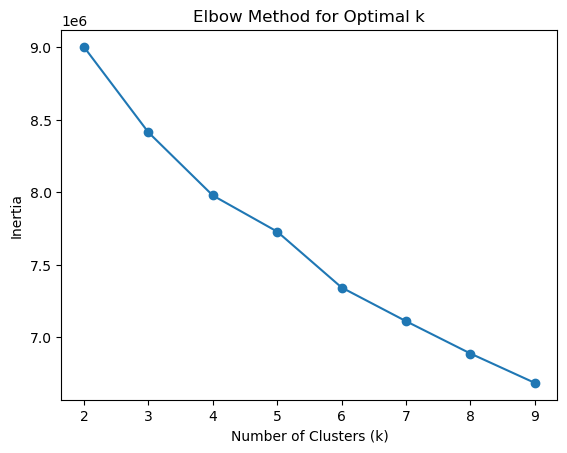

In [7]:
from sklearn.cluster import KMeans

# Ye ol' elbow method

inertia = []
k_range = range(2,10)
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scld_features)
  inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_range, inertia, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [8]:
# Fit K-Means with optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(scld_features)

# Analyze clusters
print(df.groupby("Cluster").mean())  # View cluster characteristics

             State       Sex  GeneralHealth  PhysicalHealthDays  \
Cluster                                                           
0        33.669068  0.407414       1.564945            4.384692   
1        33.630932  0.533846       2.672484           16.202982   
2        34.605661  0.982349       1.398273            2.222270   
3        32.118357  0.505435       1.412404            2.827934   
4        34.701177  0.030819       1.355117            1.747505   

         MentalHealthDays  LastCheckupTime  PhysicalActivities  SleepHours  \
Cluster                                                                      
0                8.784434         0.536835            0.806629    6.725170   
1                8.995436         0.127410            0.442526    6.913123   
2                3.563317         0.260652            0.797410    7.128067   
3                4.111928         0.424801            0.795610    6.799517   
4                2.688645         0.467494            0.841685

In [ ]:
from sklearn.metrics import silhouette_score

# Fit K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(scld_features)

# Calculate Silhouette Score
score = silhouette_score(scld_features, labels)
print(f"Silhouette Score for k=5: {score:.2f}")